Number of images in Demented directory: 3018
Number of images in NonDemented directory: 3200


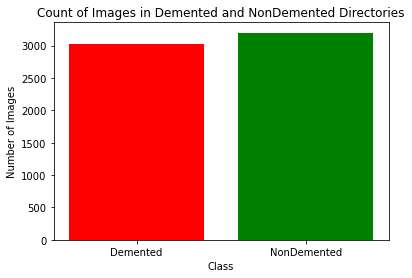

In [1]:
import os
import matplotlib.pyplot as plt

def count_images_in_directory(directory):
    image_count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_count += 1
    return image_count

# Example usage:
data_dir = r"/home/lab5/Downloads/combined"
demented_dir = os.path.join(data_dir, 'Demented')
non_demented_dir = os.path.join(data_dir, 'NonDemented')

num_demented_images = count_images_in_directory(demented_dir)
num_non_demented_images = count_images_in_directory(non_demented_dir)

# Print counts
print("Number of images in Demented directory:", num_demented_images)
print("Number of images in NonDemented directory:", num_non_demented_images)

# Plotting
labels = ['Demented', 'NonDemented']
counts = [num_demented_images, num_non_demented_images]

plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Count of Images in Demented and NonDemented Directories')
plt.show()


In [2]:
# pip install opencv-python

In [3]:
import os
import cv2
import numpy as np

def preprocess_image(image_path, target_size):
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize the image
    resized_image = cv2.resize(image, target_size)
    
    # Rescale the image (optional)
    resized_image = resized_image.astype('float32') / 255.0
    
    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    return grayscale_image

def preprocess_directory(directory, target_size):
    preprocessed_images = []
    labels = []
    label = 0 if directory.endswith('NonDemented') else 1  # Assign label based on directory name
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Ensure only image files are processed
            image_path = os.path.join(directory, filename)
            preprocessed_image = preprocess_image(image_path, target_size)
            preprocessed_images.append(preprocessed_image)
            labels.append(label)
    return preprocessed_images, labels

# Example usage:
target_size = (224,224)  # Specify your desired target size

demented_dir = os.path.join(data_dir, 'Demented')
non_demented_dir = os.path.join(data_dir, 'NonDemented')


preprocessed_demented_images, demented_labels = preprocess_directory(demented_dir, target_size)
preprocessed_non_demented_images, non_demented_labels = preprocess_directory(non_demented_dir, target_size)

# Combine the data from both directories
images = preprocessed_demented_images + preprocessed_non_demented_images
labels = demented_labels + non_demented_labels

# Now, all_images contains preprocessed image data and all_labels contains corresponding labels.
images = np.array(images)
labels = np.array(labels)



In [4]:
from sklearn.model_selection import train_test_split
# Separate data for Normal and Tuberculosis classes
# nonDemented_images = images[labels == 0][:2000]
# Demented_images = images[labels == 1][:2000]
# nonDemented_labels = labels[labels == 0][:2000]
# Demented_labels = labels[labels == 1][:2000]

# Concatenate the data back together
# images = np.concatenate([nonDemented_images, Demented_images])
# labels = np.concatenate([nonDemented_labels, Demented_labels])
# # Split the balanced dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


# Split the data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)



#print the balanced data
print("Balanced Images:",images.shape)
print("Balanced labels:",labels.shape)

#print the data seperately of each class
# print("nonDemented_images:",nonDemented_images.shape)
# print("Demented_images:",Demented_images.shape)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_valid shape:", y_valid.shape)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Balanced Images: (6218, 224, 224)
Balanced labels: (6218,)
X_train shape: (4476, 224, 224)
X_valid shape: (498, 224, 224)
X_test shape: (1244, 224, 224)
y_train shape: (4476,)
y_test shape: (1244,)
y_valid shape: (498,)


#    GlobalAveragePooling2D+Dense (512 units, ReLU activation)+Dense (1 unit, sigmoid activation)

2024-03-25 14:56:03.010020: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 14:56:03.053305: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 14:56:03.303448: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 14:56:03.303487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 14:56:03.349958: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

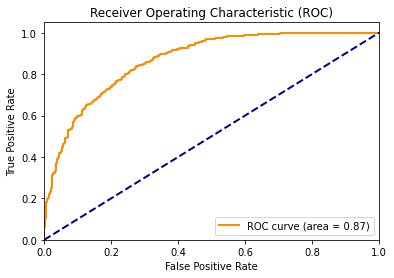

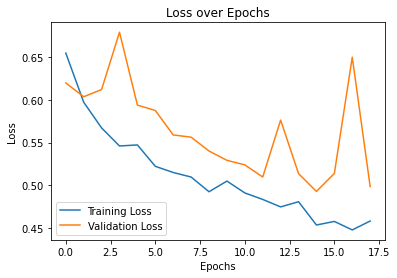

Accuracy: 0.7733118971061094
Precision: 0.7852459016393443
Recall: 0.7603174603174603
F1 Score: 0.7725806451612903
Confusion Matrix:
[[483 131]
 [151 479]]
Cohen's Kappa: 0.5467362654400745
Matthews Correlation Coefficient: 0.5470189801215983
Balanced Accuracy: 0.7734812057287628
True Positives: 479
True Negatives: 483
False Positives: 131
False Negatives: 151


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import cv2
import time
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
# Start time
start_time = time.time()

# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (224, 224)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)



# Train the model with early stopping and 10 epochs (change as needed)
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
# Calculate Cohen's Kappa
total_agreements = conf_matrix[0, 0] + conf_matrix[1, 1]
total = np.sum(conf_matrix)
po = total_agreements / total
pe = ((np.sum(conf_matrix[0]) / total) * (np.sum(conf_matrix[:, 0]) / total)) + ((np.sum(conf_matrix[1]) / total) * (np.sum(conf_matrix[:, 1]) / total))
kappa = (po - pe) / (1 - pe)

# Calculate Matthews Correlation Coefficient
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# Calculate Balanced Accuracy
sensitivity = recall_score(y_test, predicted_labels)
specificity = tn / (tn + fp)
balanced_accuracy = (sensitivity + specificity) / 2
# Print Additional Metrics
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)
# Save metrics to DataFrame
# Save metrics to DataFrame
metrics = {
    'Combination':'1',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Test Accuracy': test_accuracy * 100,
    'Test Loss': test_loss * 100,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    "Cohen's Kappa": kappa,
    'Matthews Correlation': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'True Positives': tp,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'Execution Time (s)': execution_time
}
metrics_df = pd.DataFrame(metrics, index=[0])

# Save DataFrame to CSV
metrics_df.to_csv('VGG16_Final_50_metrics.csv', index=False)

print("Metrics saved to metrics.csv file.")

# Combination 1:
    Flatten
    Dense (512 units, ReLU activation)
    Dense (1 unit, sigmoid activation)

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten  # Import Flatten layer
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import pandas as pd
# Start time
start_time = time.time()

# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (224, 224)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = Flatten()(base_model.output)  # Use Flatten layer
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)



# Train the model with early stopping and 10 epochs (change as needed)
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('VGG16_Final_50_metrics.csv')
# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['2'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('VGG16_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

# Combination 2:

    Conv2D (64 filters, kernel size 3x3, ReLU activation, padding 'same')
    MaxPooling2D (pool size 2x2, strides 2x2)
    Flatten
    Dense (512 units, ReLU activation)
    Dense (1 unit, sigmoid activation)

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Conv2D, MaxPooling2D  # Add imports
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (224, 224)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)


# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)


# Train the model with early stopping and 10 epochs (change as needed)
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('VGG16_Final_50_metrics.csv')
# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['3'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('VGG16_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

# Combination 3:

    Conv2D (128 filters, kernel size 3x3, ReLU activation, padding 'same')
    MaxPooling2D (pool size 2x2, strides 2x2)
    Flatten
    Dense (512 units, ReLU activation)
    Dense (1 unit, sigmoid activation)

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()
# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (224, 224)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)


# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)


# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)



# Train the model with early stopping and 10 epochs (change as needed)
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('VGG16_Final_50_metrics.csv')
# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['4'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('VGG16_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

# Combination 4:

    Conv2D (64 filters, kernel size 3x3, ReLU activation, padding 'same')
    Conv2D (64 filters, kernel size 3x3, ReLU activation, padding 'same')
    MaxPooling2D (pool size 2x2, strides 2x2)
    Flatten
    Dense (512 units, ReLU activation)
    Dense (1 unit, sigmoid activation)

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()
# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (224, 224)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)


# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)


# Train the model with early stopping and 10 epochs (change as needed)
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50,validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('VGG16_Final_50_metrics.csv')
# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['5'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('VGG16_Final_50_metrics.csv', index=False)


